# Final Project

**Due date: Saturday, December 9th**

For your final project you will develop a data narrative with a dataset of your choosing. Your data can come from any source. You do not have to comprehensively explore your data. Pick an interesting aspect or two from which to build your narrative.

## Requirements

- At least **three** visualizations. Visualizations can be simple bar charts that total data categories or rich exploratory figures. (*Tables also count as visualizations but you must have at least two charts.*) 
- All of the code should be recorded in your narrative. That is, I should be able to run your notebook code start to finish re-producing each of your outputs without error.
- At least **two** but no more than **three** paragraphs walking the reader through your analysis.
- Charts should exhibit your command of `ggplot2/dplyr/forcats/tidyr` with: 
  - sensibly sorted categories, 
  - interpretable labels/axis titles, 
  - useful annotations (when applicable), 
  - adjustments to default chart aesthetics, 
  - appropriate markings (e.g. `geoms`) and encodings.

## Notes

*This project should not take you longer than the time to complete two of our assignments. It is meant to demonstrate that you can build an analysis using `R` and the `Tidyverse` from scratch. Focus your analysis on a small number of data features that you find interesting.*

*Remember all the ways of visualizing distributions (ECDFs, histograms, jitter-ed scatter plots, etc.). These will come in very handy!* 

In [1]:
library('tidyverse')

install.packages("RColorBrewer")                   # Install RColorBrewer package
library("RColorBrewer")   

# link to kaggle dataset: https://www.kaggle.com/datasets/elanderos/official-crime-stats-mexico-2015-2023

Warning message:
“Failed to locate timezone database”
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.3     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



Rows: 332416 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (6): entity, affected_legal_good, type_of_crime, subtype_of_crime, modal...
dbl (3): year, entity_code, count

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


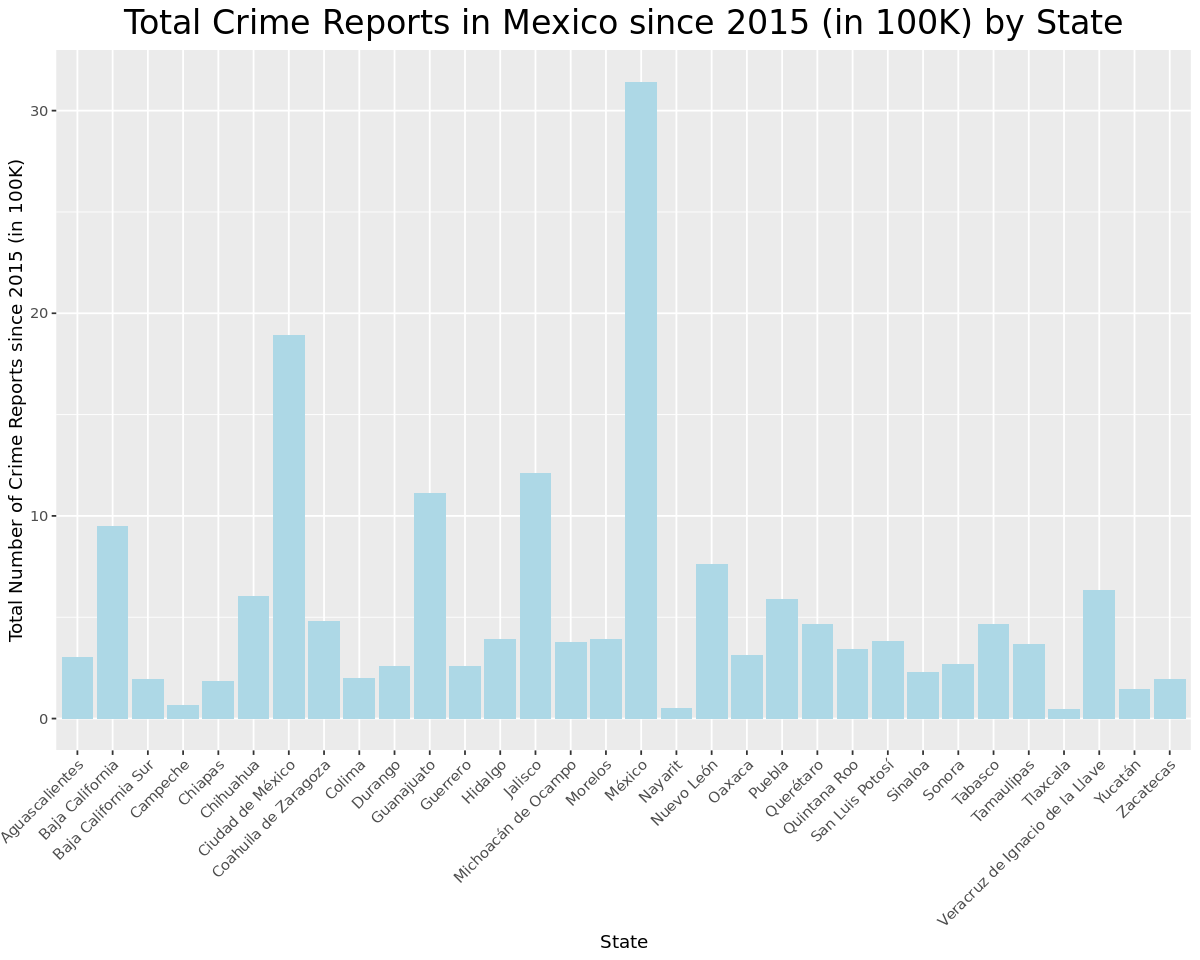

In [2]:
mex_data <- read_csv('mexico_crime.csv') # reads in the csv file

names(mex_data)[names(mex_data) == "count"] = "total" # changes the variable name for count to total
names(mex_data)[names(mex_data) == "entity"] = "state" # changes the variable name for count to total

# mex_data |> head(5) # gives the first 5 rows in the dataset

states <- mex_data |> group_by(state) |> # groups the dataset by state
    summarize(total = sum(total/100000, na.rm = TRUE)) |> # sums up the number of crime reports by state and then divides by 100K
    rename(total_in100k = total) # renames the total variable to account for it being in 100K

options(repr.plot.width = 10, repr.plot.height = 8) # sets plot dimensions


plot <- ggplot(states, aes(state, total_in100k)) + geom_col(fill = "light blue") + 
    labs(x = "State", y = "Total Number of Crime Reports since 2015 (in 100K)") + 
    ggtitle("Total Crime Reports in Mexico since 2015 (in 100K) by State") +
    theme(axis.text.x = element_text(angle = 45, hjust = 1), plot.title = element_text(hjust = 0.5, size = 20)) # creates a barplot

plot

month,t10k
<ord>,<dbl>
January,3.0984
February,3.1173
March,3.6312
April,3.4247
May,3.6582
June,3.4605
July,3.1912
August,3.2963
September,3.1991


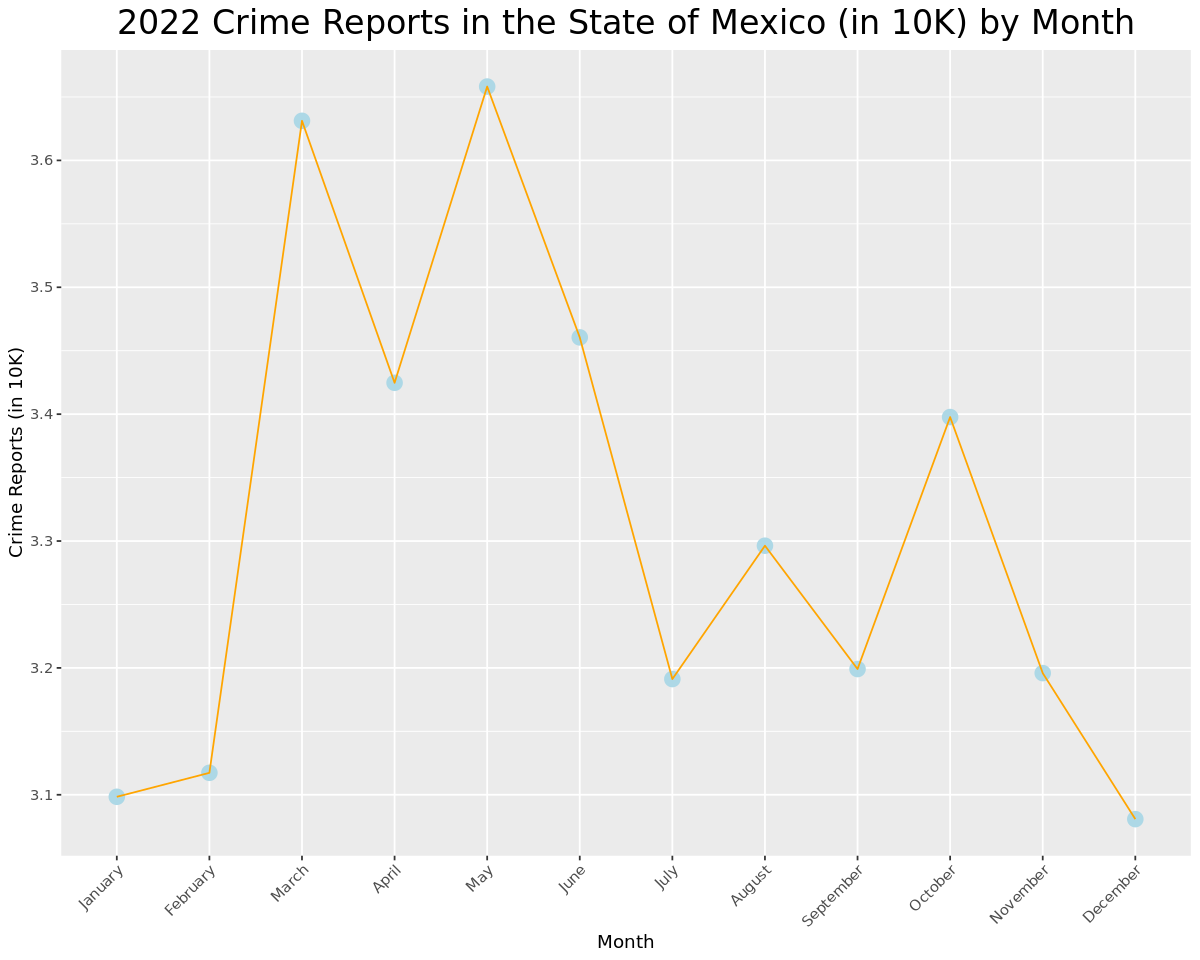

In [3]:
som_22 <- mex_data[mex_data$year == 2022 & mex_data$state == "México",] # creates a dataset of only 2022 data

months_order <- c("January", "February", "March", "April", 
                  "May", "June", "July", "August", 
                  "September", "October", "November", "December") # creates an ordered list of months

som_22$month <- factor(som_22$month, levels = months_order, ordered = TRUE) # orders 2022 dataset chronologically

som2022 <- som_22 |> group_by(month) |> # groups ds by month
    summarize(total = sum(total/10000, na.rm =TRUE)) |> # adds up the total crime reports by month and divides by 10,000
    rename(t10k = total) # renames the crime reports variable # 

options(repr.plot.width = 10, repr.plot.height = 8) # sets plot dimensions


plot_1 <- ggplot(som2022, aes(month, t10k, group = 1)) + 
    geom_point(color = "light blue", size = 4) + 
    geom_line(color = "orange") +
    labs(title = "2022 Crime Reports in the State of Mexico (in 10K) by Month", x = "Month", y = "Crime Reports (in 10K)") +
    theme(axis.text.x = element_text(angle = 45, hjust = 1), plot.title = element_text(hjust = 0.5, size = 20)) # creates a barplot
    # creates the line plot

plot_1

som2022

In [4]:
som2022_may <- mex_data[mex_data$month == "May" & mex_data$year == 2022 & mex_data$state == "México",] # creates a dataset of all the crime reports in the state of Mexico in May 2022

type <- som2022_may |> group_by(type_of_crime) |> # groups by type of crime
    summarize(total = sum(total, na.rm = TRUE)) |> # sums up the total by type of crime
    slice_max(order_by = total, n=8) # only includes top 8 types of crimes

type

type_of_crime,total
<chr>,<dbl>
Robbery,11866
Other common law crimes,6856
Injuries,6452
Domestic violence,2847
Property damage,1534
Fraud,1213
Sexual abuse,573
Extortion,555


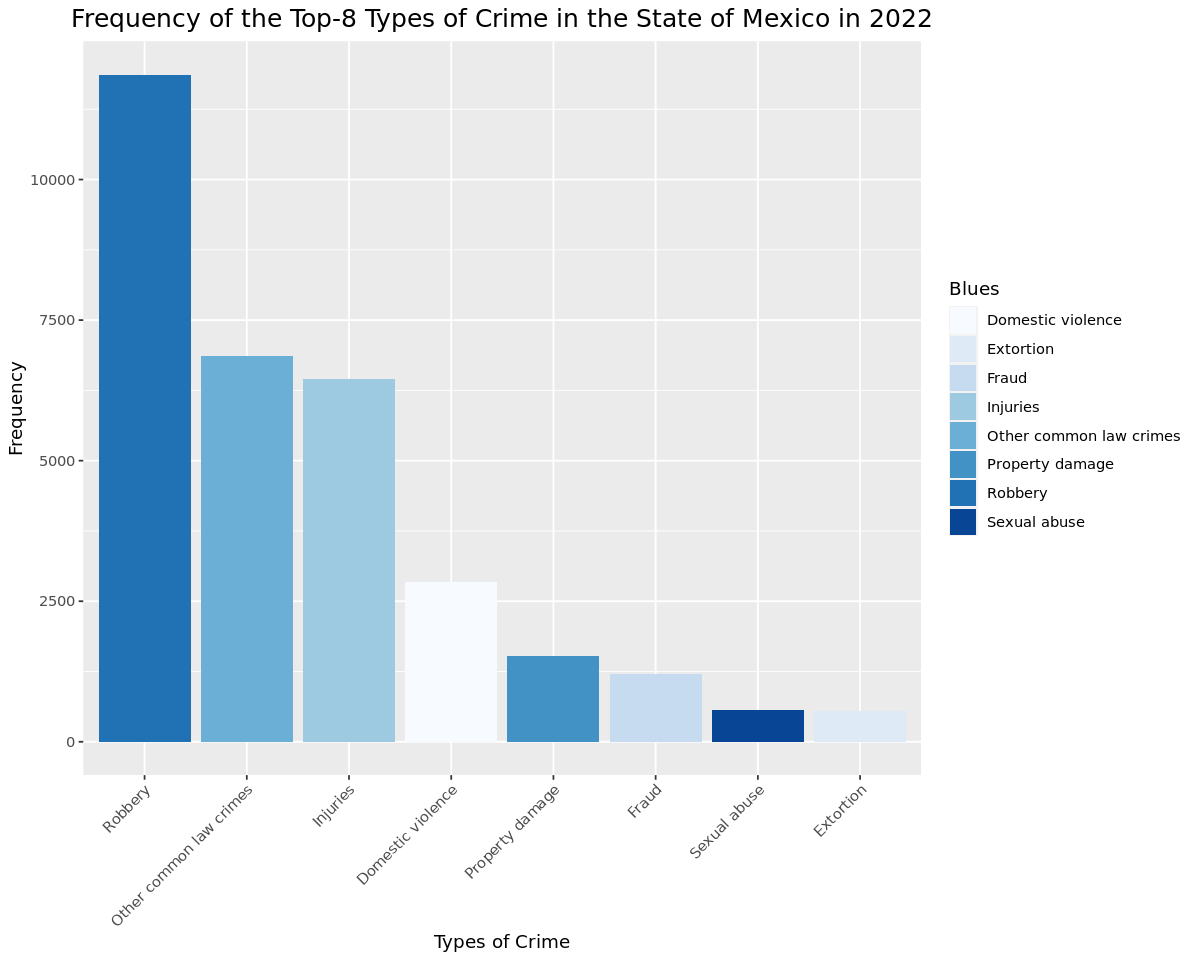

In [5]:
options(repr.plot.width = 10, repr.plot.height = 8) # sets plot dimensions

p <- ggplot(type, aes(x = reorder(type_of_crime, desc(total)), y = total, fill = type_of_crime)) + 
    geom_col() + scale_fill_brewer("Blues") +
    labs(title = "Frequency of the Top-8 Types of Crime in the State of Mexico in 2022", x = "Types of Crime", y = "Frequency") +
    theme(axis.text.x = element_text(angle = 45, hjust = 1), plot.title = element_text(hjust = 0.5, size = 15)) # creates a barplot
    # creates the plot
p

   I found a dataset on kaggle that reports crime reports across the states in Mexico from 2015 to 2023. This dataset also includes variables for the type of crime reported, the subtype of crime reported, and the modality in which it was reported. In my analysis of this dataset, I used a funnel type approach were I looked at the country holistically, then narrowed down on a specific state, the State of Mexico, to conduct a deeper analysis. I chose to focus on three main aspects of the dataset, what state had the most crimes reported in this 8 year span, what months were these crimes reported the most in the last year, and what crimes were reported the most.
   
   I first read in the csv file using the read_csv function and named it mex_data. I then renamed the count variable to total and the entity variable to state so as to make it clear that I was looking at the total crimes reported and Mexican states, respectively. Then I created the states subset by grouping mex_data by states and summing up the total crime reports by state, in terms of one hundred thousand reports. I then plotted this data and found that the state of Mexico has received the most crime reports since 2015. 

Diving deeper into this state, I wanted to see how much the frequency crime reports changes throughout the year. Thus I used the most recent, and complete, year - 2022 (2023 data has only been released up to October). Thus I created the som_22 dataset which signified the crime reports in the state of Mexico in 2022, and used a months factor to order the set chronologically. I then created the som2022 dataset which groups the reports by month and sums up the number of reports, in terms of ten thousand reports. I found that May had the highest number of reports. Then, I created the some2022_may subset which had values of all the reports in May 2022 in the state of Mexico. Then I created the types dataset which grouped the set by the type of crime reported and chose the top 8 most frequent. I found that the most common type of crime reported was Robberies. This analysis can inform us on what specific types of crimes tourists and police officers need to be wary of during certain times of the year in the state of Mexico.